In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("students_data.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# drop unnamed column


In [8]:
df= df.drop("Unnamed: 0", axis = 1)#vertically
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender Distribution

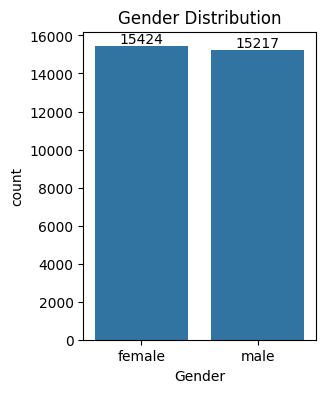

In [9]:
plt.figure(figsize= (3, 4))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show() # number of female > number of male

In [10]:
gp = df.groupby("ParentEduc").agg({"MathScore": 'mean',
                                  "ReadingScore": "mean",
                                  "WritingScore": 'mean'})
print(gp)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


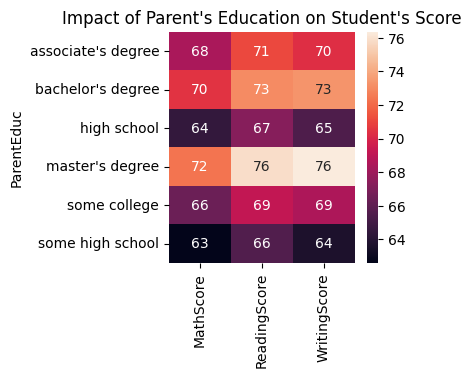

In [11]:
plt.figure(figsize= (3, 3))
sns.heatmap(gp, annot = True)
plt.title("Impact of Parent's Education on Student's Score")
plt.show() # this concludes that education of parents have a good impact on students scores

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


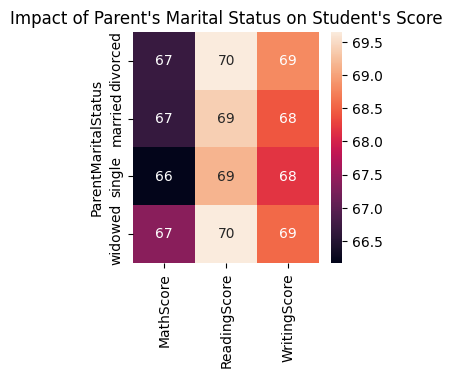

In [12]:
gp1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean',
                                  "ReadingScore": "mean",
                                  "WritingScore": 'mean'})
print(gp1)
plt.figure(figsize= (3, 3))
sns.heatmap(gp1, annot = True)
plt.title("Impact of Parent's Marital Status on Student's Score")
plt.show() #parents Marital status has negligible impact or less impact

# Distribution of Marks

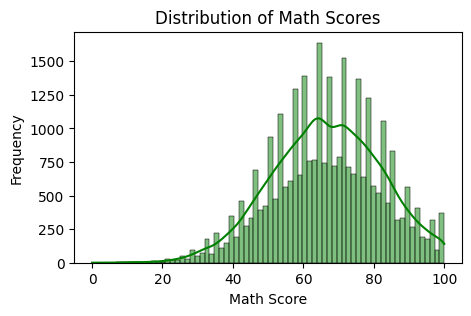

In [13]:
plt.figure(figsize=(5, 3))
sns.histplot(df['MathScore'], kde=True, color='green')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


# Average Study Hours by MathScore

Text(0, 0.5, 'Math Score')

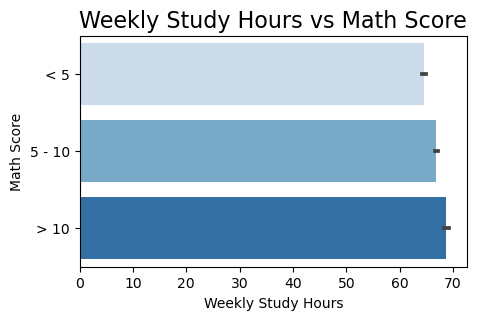

In [41]:
plt.figure(figsize=(5, 3))
sns.barplot(x='MathScore', y='WklyStudyHours', data=df, palette='Blues') #this shows that students who study more than 10 hours scored more in maths
plt.title('Weekly Study Hours vs Math Score', fontsize=16)
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')

# Scores Distribution by Gender

Text(0.5, 1.0, 'Score Distribution by Gender')

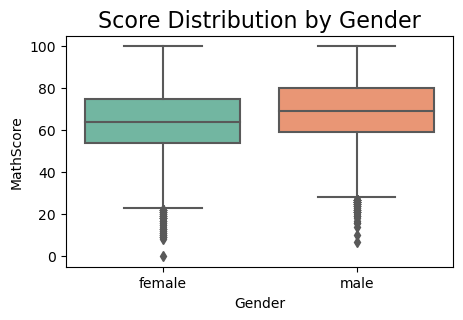

In [49]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Gender', y='MathScore', data=df, palette='Set2')
plt.title('Score Distribution by Gender', fontsize=16)

<AxesSubplot:xlabel='Gender', ylabel='ReadingScore'>

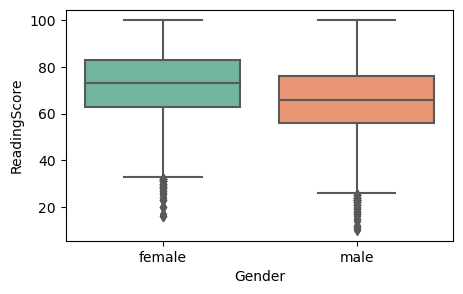

In [51]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Gender', y='ReadingScore', data=df, palette='Set2')

<AxesSubplot:xlabel='Gender', ylabel='WritingScore'>

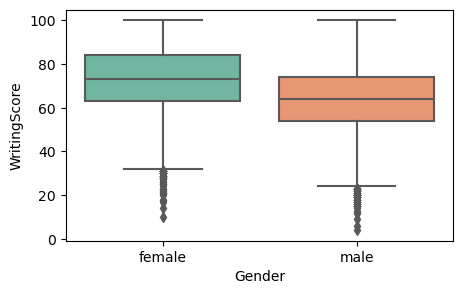

In [50]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Gender', y='WritingScore', data=df, palette='Set2')

# PracticeSport  VS MathScore

<AxesSubplot:xlabel='PracticeSport', ylabel='MathScore'>

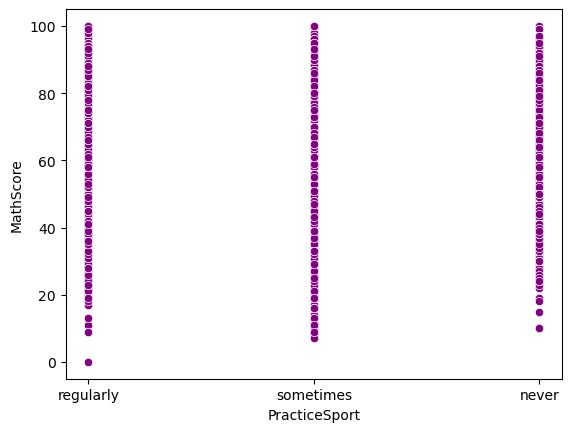

In [52]:
sns.scatterplot(x='PracticeSport', y='MathScore', data=df, color='purple') #this shows that studnets who practice regularly have good scores

# Distribution Of Ethnic Groups

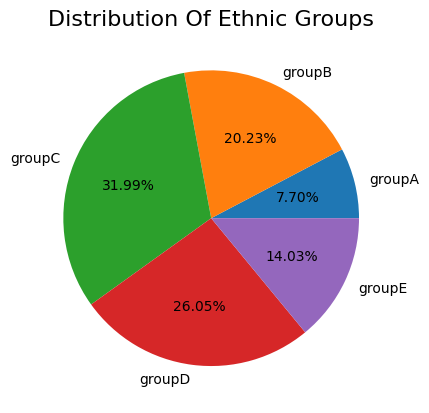

In [22]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()
l = ["groupA", "groupB", "groupC", "groupD", "groupE"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title('Distribution Of Ethnic Groups', fontsize=16)
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

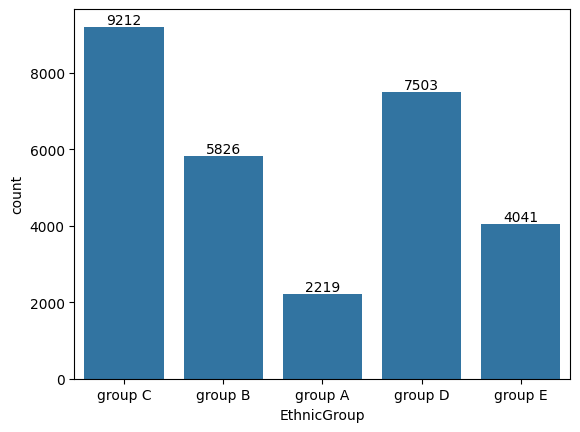

In [23]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])